<b>Bernstein-Vazirani Algorithm</b>

In this notebook we will see a new quantum algorithm, called Bernstein-Vazirani, that is very similar to last algorithm we have seen, Deutsch-Jozsa algorithm, that can guess if a given function f(x) is constant or is balanced with one only call, while classical solution has to do more evaluations. In this case, Bernstein-Vazirani algorithm doesn't want to guess the type of f(x), it wants to know more intern details of it.  
  
We suppose that f(x) returns an output based on the bitwise product of the input and a string called s -> f(x) = s * x (mod 2). The aim of Bernstein-Vazirani algorithm is to discover that string s. To do it, follows the Deutsch-Jozsa algorithm, but with some changes, so it is based on that algorithm.

First we are going to describe the <b>classical solution</b>, and then we will do the quantum solution.  
  
Function f(x) is described, as we have seen, as:  
  
$f_s(x) = s \cdot x \mod 2$  
  
So, to discover the string s, we have to call the oracle (the part of the circuit that has got the logic of that function) too many times as the size of the string s, and on every call, the input will be a string with all 0s except one position, that will be a bit 1 and the oracle will return us the bit of s that is in that position. We can see this example clearly with that table:  
  

| Input |
| --- |
| 100...0 |
| 010...0 |
| 001...0 |
| 000...1 |  
  
We have to test the oracle with all strings that have a bit 1 in all different positions, and we will obtain every bit of the secret string s.

With a quantum solution, we only have to do 1 call to the function f(x). The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/bv1.png">  
  
First, we apply X gate to last qubit (the qubit of the second register), and then we apply Hadamart to all qubits of the circuit to get a superposition of all. Then we will query the oracle, and we will undo the Hadamart operation we did first by applying another Hadamart gate to all qubits of the first register (the input qubits), because inverse Hadamart is itself. Finally, we will measure that input qubits and see the result.

So we are going to build the circuit that does Bernstein-Vazirani algorithm, and the oracle will be an identity gate for every 0 in secret string s, and a CNOT with every 1 in secret string s as a control qubit, and the last qubit (that is the second register with state |->) as target qubit.  
  
To do an example, we will take a secret string s with size 3, n=3, and s = 010.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
import numpy as np

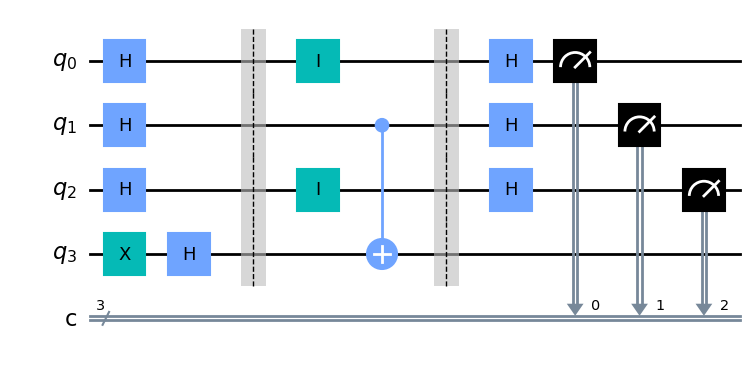

In [2]:
'''s='010'''
algorithm = QuantumCircuit(4, 3) # circuit with 3 input qubits (size of secret string s) and the output qubit in state |->

algorithm.x(3) # put last qubit in state |->
algorithm.h([0,1,2,3])
algorithm.barrier()

'''build the oracle'''
algorithm.i(2)
algorithm.cx(1,3)
algorithm.i(0)
algorithm.barrier()

'''undo Hadamart gates'''
algorithm.h([0,1,2])
algorithm.measure([0,1,2],[0,1,2])

algorithm.draw(output='mpl')

And now we are ready to compile the circuit and execute it on a simulator to see the results:

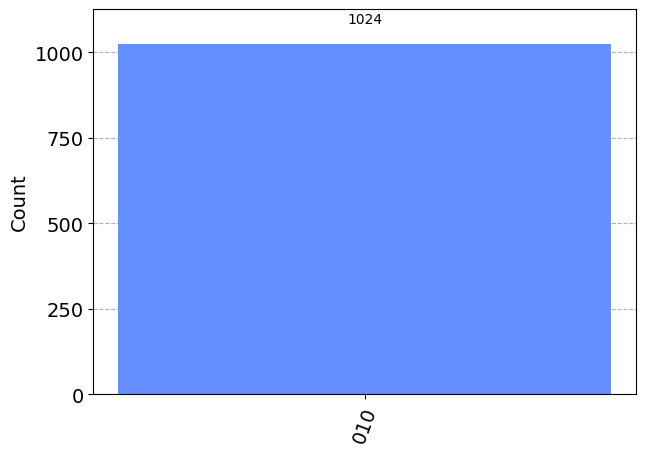

In [3]:
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(algorithm)
histogram = simulator.run(qobj).result().get_counts()
plot_histogram(histogram)

And we see that we get the secret string from the input qubits! So the circuit works perfectly.